<a href="https://colab.research.google.com/github/m-RafliRangga-p/AI_UAS/blob/main/AI_UAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama  : Muhammad Rafli Rangga Pratama \
NIM   : 22.11.4668 \
Kelas : 22IF02

# Import Library and Dataset

In [22]:
from google.colab import drive
drive.mount('/content/drive')

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt
import numpy as np

# Define paths
base_dir = '/content/drive/MyDrive/AI'  # Path ke folder paling atas dari dataset
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# Image data generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load images
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 166 images belonging to 7 classes.
Found 19 images belonging to 7 classes.
Found 23 images belonging to 7 classes.


# Verify Dataset

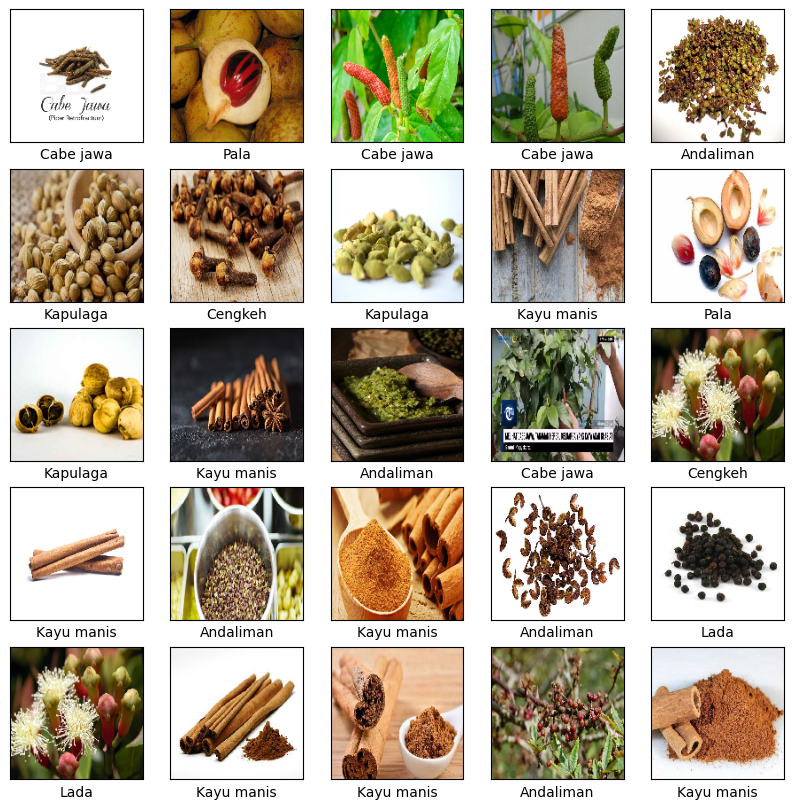

In [23]:
# Verifying data
# Get a batch of training data
sample_training_images, sample_training_labels = next(train_generator)

# Define the class names based on the sub-folder names
class_names = list(train_generator.class_indices.keys())

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(sample_training_images[i])
    plt.xlabel(class_names[np.argmax(sample_training_labels[i])])
plt.show()

# Model

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((3, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((3, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((3, 3)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(7, activation='softmax')  # 7 classes for the spices
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 49, 49, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 47, 47, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 4, 4, 32)         

# Training

In [25]:
history = model.fit(
    train_generator,
    epochs=38,
    validation_data=val_generator
)


Epoch 1/38
6/6 [==============================] - 8s 1s/step - loss: 1.9700 - accuracy: 0.1084 - val_loss: 1.9408 - val_accuracy: 0.1579
Epoch 2/38
6/6 [==============================] - 6s 835ms/step - loss: 1.9293 - accuracy: 0.1807 - val_loss: 1.9258 - val_accuracy: 0.2632
Epoch 3/38
6/6 [==============================] - 5s 775ms/step - loss: 1.9160 - accuracy: 0.2892 - val_loss: 1.9103 - val_accuracy: 0.2632
Epoch 4/38
6/6 [==============================] - 7s 1s/step - loss: 1.8802 - accuracy: 0.2952 - val_loss: 1.8762 - val_accuracy: 0.2632
Epoch 5/38
6/6 [==============================] - 5s 790ms/step - loss: 1.8223 - accuracy: 0.3675 - val_loss: 1.7749 - val_accuracy: 0.3158
Epoch 6/38
6/6 [==============================] - 7s 1s/step - loss: 1.8192 - accuracy: 0.2651 - val_loss: 1.8361 - val_accuracy: 0.2105
Epoch 7/38
6/6 [==============================] - 5s 835ms/step - loss: 1.6732 - accuracy: 0.3554 - val_loss: 1.6507 - val_accuracy: 0.2105
Epoch 8/38
6/6 [=============

# Testing

In [26]:
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')

1/1 [==============================] - 0s 386ms/step - loss: 1.4409 - accuracy: 0.4783
Test accuracy: 0.47826087474823


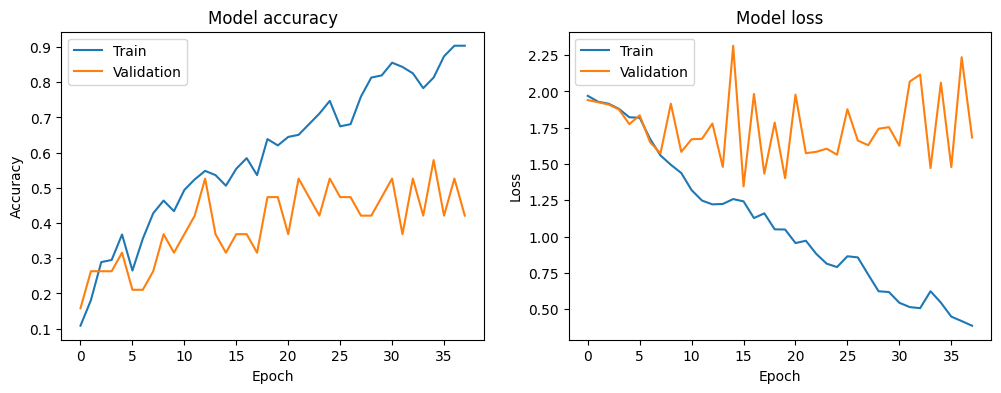

In [27]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

1/1 [==============================] - 0s 250ms/step


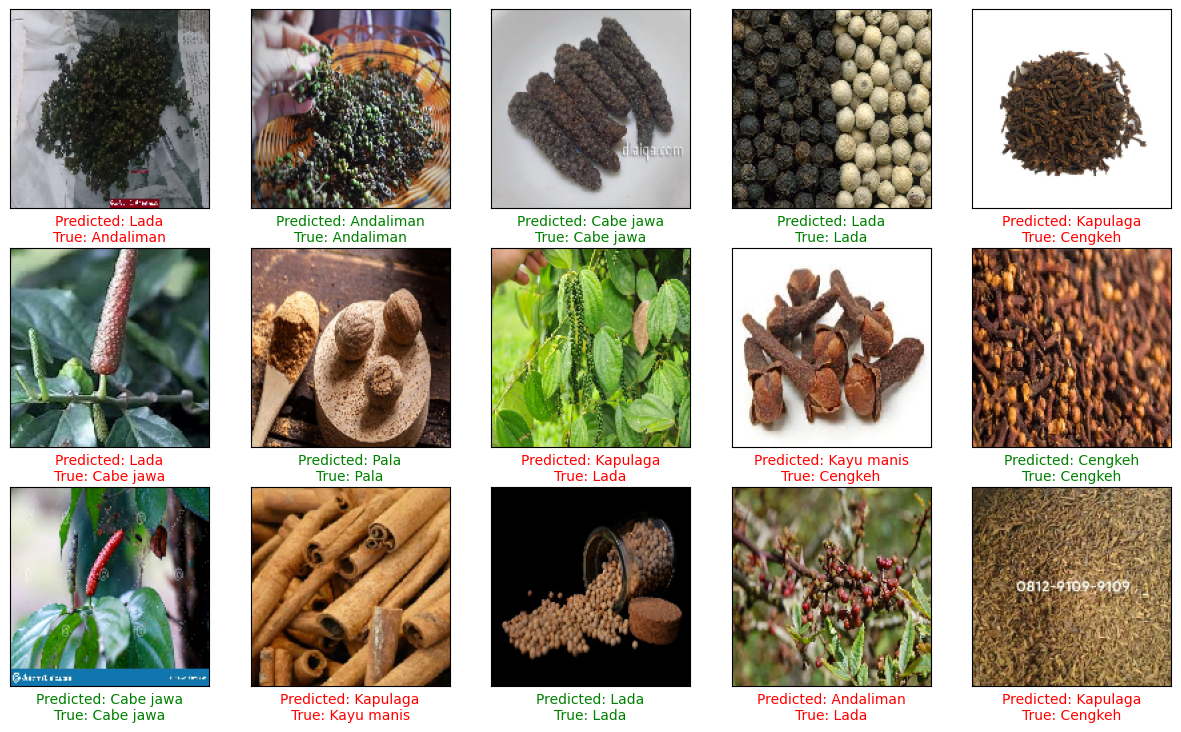

In [28]:
# Menampilkan contoh keakurasian pengujian
# Mengambil batch dari test_generator
sample_test_images, sample_test_labels = next(test_generator)

# Melakukan prediksi
predictions = model.predict(sample_test_images)

# Mendapatkan nama kelas berdasarkan sub-folder names
class_names = list(test_generator.class_indices.keys())

plt.figure(figsize=(15, 15))
for i in range(15):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(sample_test_images[i])

    # Mendapatkan prediksi dan label sebenarnya
    predicted_label = class_names[np.argmax(predictions[i])]
    true_label = class_names[np.argmax(sample_test_labels[i])]

    # Menentukan warna label
    color = 'green' if predicted_label == true_label else 'red'

    plt.xlabel(f"Predicted: {predicted_label}\nTrue: {true_label}", color=color)
plt.show()